In [27]:
import random
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random datetime within a specified range
def random_date(start_date, end_date):
    return start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))
# Function to generate a dataset
def generate_weather_dataset(num_records):
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 1, 31)
    
    weather_data = []

    for i in range(num_records):
        timestamp = random_date(start_date, end_date)
        
        temperature = round(random.uniform(25, 30), 2)
        humidity = random.uniform(80, 90)  
        precipitation = round(random.uniform(30, 50), 2)  
        sun_exposure = round(random.uniform(600, 800), 2)  
        wind_speed = round(random.uniform(10, 15), 2)  
        wind_direction = random.randint(180, 360) 
        weather_station = f"WeatherStation_{random.randint(1, 10)}"
        if(i>num_records/2): 
            temperature = round(random.uniform(-10, 30), 2) 
            humidity = random.uniform(20, 80)  
            precipitation = round(random.uniform(0, 20), 2)  
            sun_exposure = round(random.uniform(0, 1000), 2)  
            wind_speed = round(random.uniform(0, 10), 2)  
            wind_direction = random.randint(0, 360)
        
        flood_occurrence = floodoccurance(temperature,humidity,precipitation,sun_exposure,wind_speed,wind_direction)  # Randomly set flood occurrence flag

        weather_data.append({
            'Timestamp': timestamp,
            'Temperature_Celsius': temperature,
            'Relative_Humidity': humidity,
            'Precipitation_mm': precipitation,
            'Sun_Exposure_Wm2': sun_exposure,
            'Wind_Speed_m_s': wind_speed,
            'Wind_Angular_Direction': wind_direction,
            'Weather_Station': weather_station,
            'Flood_Occurrence': flood_occurrence
        })
        

    return weather_data
def floodoccurance(temperature,humidity,precipitation,sun_exposure,wind_speed,wind_direction):
    temperature_threshold = 25  
    humidity_threshold = 80    
    precipitation_threshold = 30  
    sun_exposure_threshold = 600  
    wind_speed_threshold = 10     
    wind_direction_threshold = 180  

    # Check conditions for flood occurrence
    if (temperature > temperature_threshold and
        humidity > humidity_threshold and
        precipitation > precipitation_threshold and
        sun_exposure > sun_exposure_threshold and
        wind_speed > wind_speed_threshold and
        wind_direction > wind_direction_threshold):
        flood_occurrence = 1
    else:
        flood_occurrence = 0
    
    return flood_occurrence



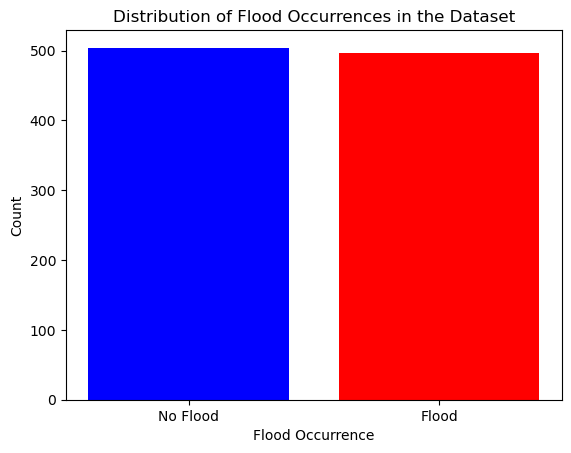

Timestamp  Temperature_Celsius  Relative_Humidity  \
972 2020-01-01 05:20:42                 4.24          43.084030   
861 2020-01-01 12:48:04                -2.31          78.471118   
110 2020-01-02 02:13:22                25.17          81.270236   
705 2020-01-04 07:26:59                -6.04          40.712025   
222 2020-01-06 14:45:07                26.45          82.133233   
..                  ...                  ...                ...   
388 2024-01-25 03:55:54                27.87          83.119703   
686 2024-01-26 12:17:43                29.18          54.550562   
947 2024-01-29 11:28:56                18.25          77.267776   
663 2024-01-29 12:03:44                 5.83          60.775472   
309 2024-01-29 20:37:57                29.82          83.624440   

     Precipitation_mm  Sun_Exposure_Wm2  Wind_Speed_m_s  \
972             19.94            594.04            3.54   
861              2.91            101.44            7.26   
110             44.05            642.13           13.46   
705             12.51            140.55            9.69   
222             45.77            659.90           11.12   
..                ...               ...             ...   
388             36.88            632.10           12.43   
686              4.67            326.96            5.99   
947             11.20            645.35            1.88   
663             14.64            931.13            4.78   
309             43.87            746.97           12.49   

     Wind_Angular_Direction    Weather_Station  Flood_Occurrence  
972                     234   WeatherStation_1                 0  
861                     236   WeatherStation_3                 0  
110                     285   WeatherStation_7                 1  
705                     355   WeatherStation_1                 0  
222                     184  WeatherStation_10                 1  
..                      ...                ...               ...  
388                     276   WeatherStation_9                 1  
686                      94  WeatherStation_10                 0  
947                     113  WeatherStation_10                 0  
663                      91   WeatherStation_4                 0  
309                     297  WeatherStation_10                 1  

[1000 rows x 9 columns]

In [28]:
# Generate a sample dataset
flood_dataset = generate_weather_dataset(1000)

# Create a DataFrame from the sample dataset
df = pd.DataFrame(flood_dataset)
df = df.sort_values(by='Timestamp')
flood_counts = df['Flood_Occurrence'].value_counts()

# Plotting the bar chart
plt.bar(flood_counts.index, flood_counts.values, color=['blue', 'red'])
plt.xlabel('Flood Occurrence')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Flood', 'Flood'])
plt.title('Distribution of Flood Occurrences in the Dataset')
plt.show()
df.to_csv('flood.csv', index=False)
df